# Обработка данных, полученных с программы

In [1]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными

In [2]:
def psi_f(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def distr(df):
    plt.figure(figsize=(7,7))
    plt.hist(df['x'], 50,facecolor='blue', alpha=0.5)
    plt.xlabel('Ось x'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Распределение пешеходов по оси'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    psi, bin_edges = np.histogram(df, 100)
    psi_sq = psi*psi
    norm = float(psi_sq.max())*2*np.pi
    psi_sq = psi_sq/norm
    psi = psi/np.sqrt(norm)

    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi, width = 0.2)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.title(''.decode('utf-8'))
    ###
    x = np.arange(-4, 4, 0.1)
    plt.plot(x, psi_f(x), color = 'black', label = '$\psi(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi_sq, width = 0.2)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()

## Стационарные данные (без первых 10%)

In [3]:
frame = pd.read_csv('output.csv')
frame90 = frame.drop(frame.index[0:frame.shape[0]/10])

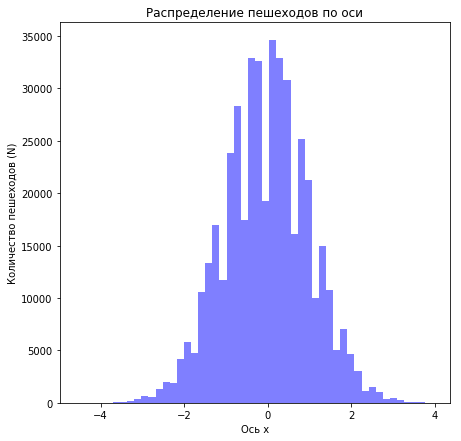

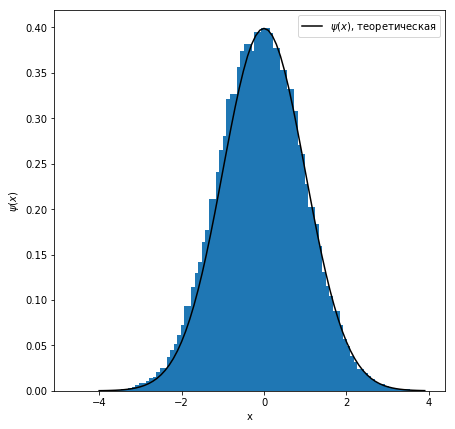

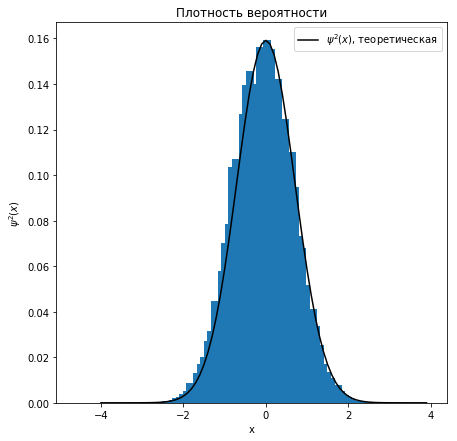

In [4]:
distr(frame90)

## Анализ первых 10% данных

In [5]:
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.show()

In [6]:
frameNE = pd.read_csv('outputNE.csv')
frame10NE = frameNE.drop(frameNE.index[frameNE.shape[0]/10:frameNE.shape[0]])

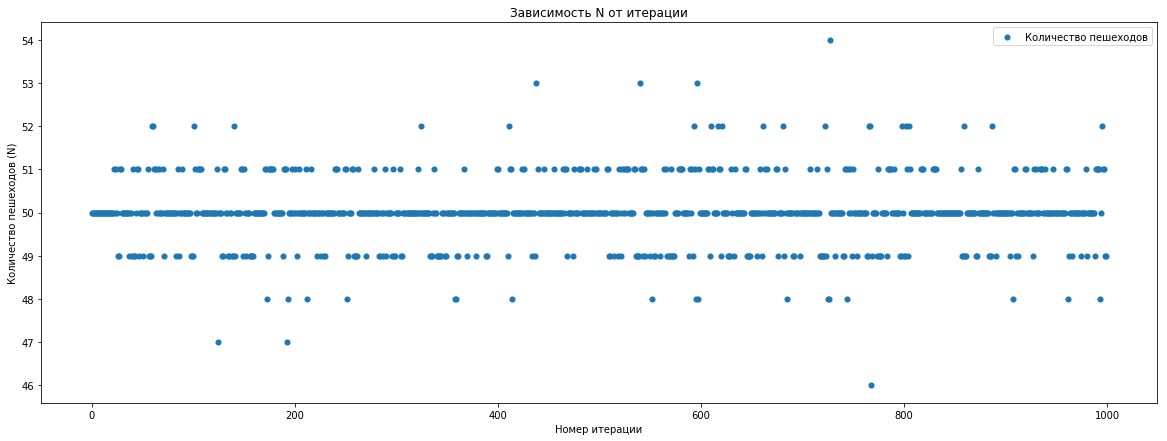

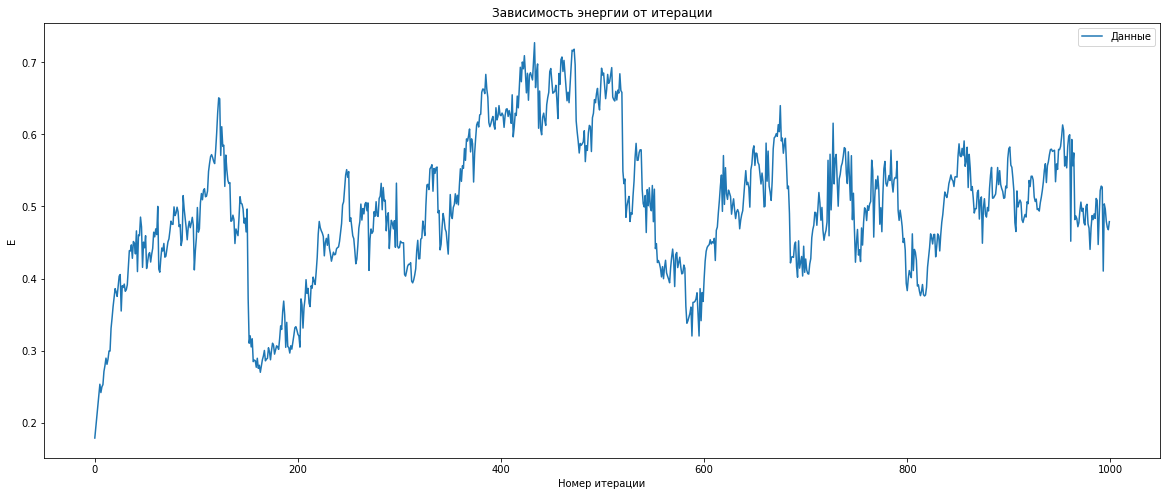

In [7]:
drawNE(frame10NE)

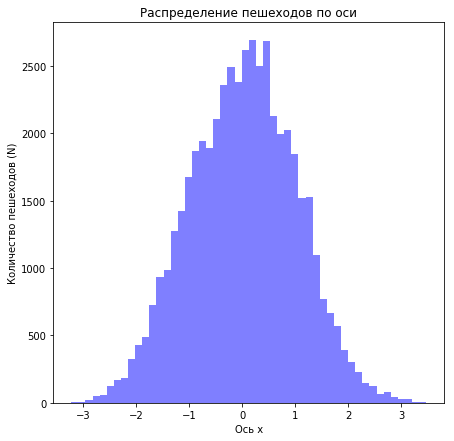

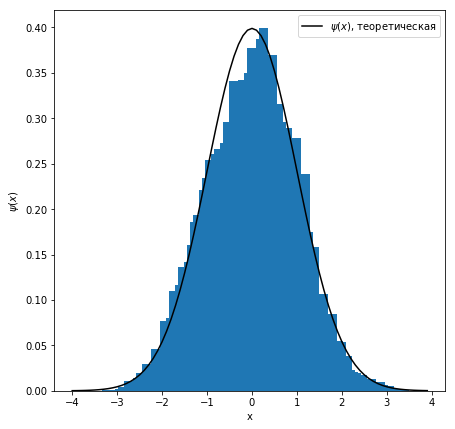

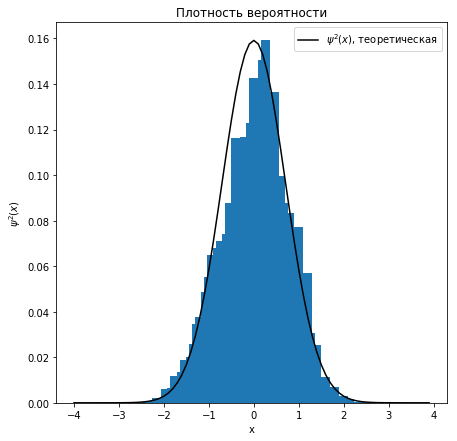

In [8]:
frame10 = frame.drop(frame.index[frame.shape[0]/10:frame.shape[0]])
distr(frame10)

## Поведение системы без вырвнивания потенциала

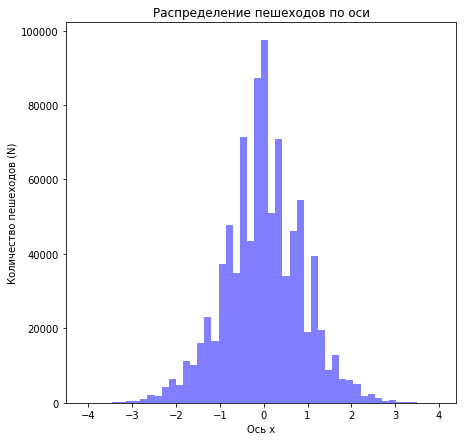

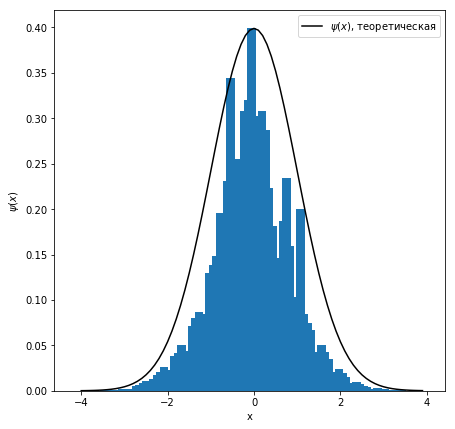

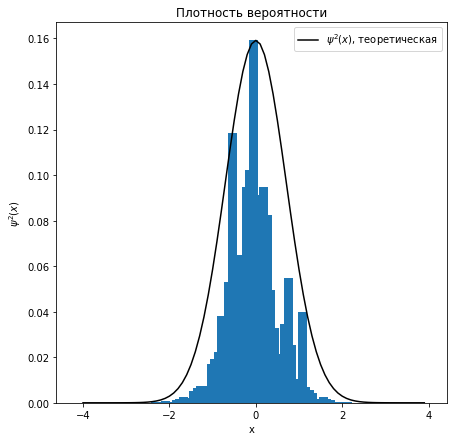

In [9]:
frame_withoutRef = pd.read_csv('output_withoutRef.csv')
distr(frame_withoutRef)

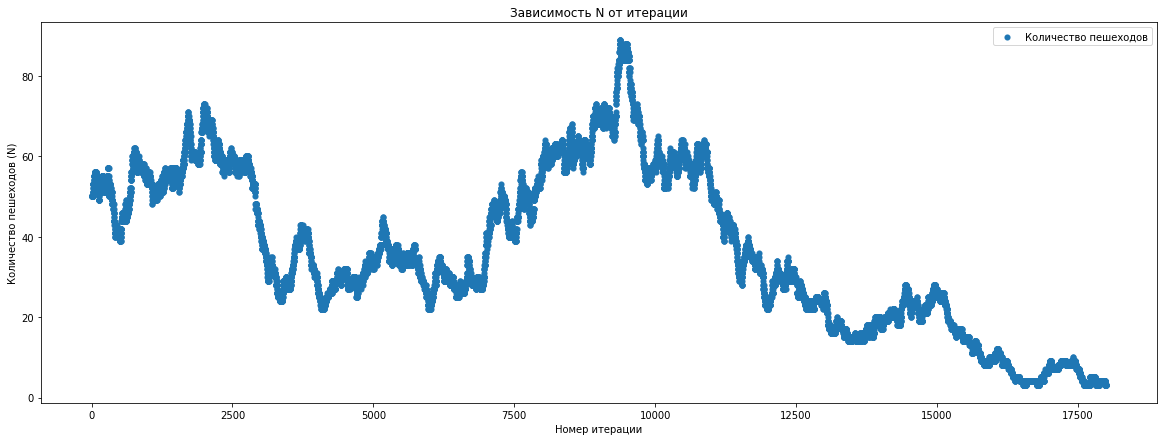

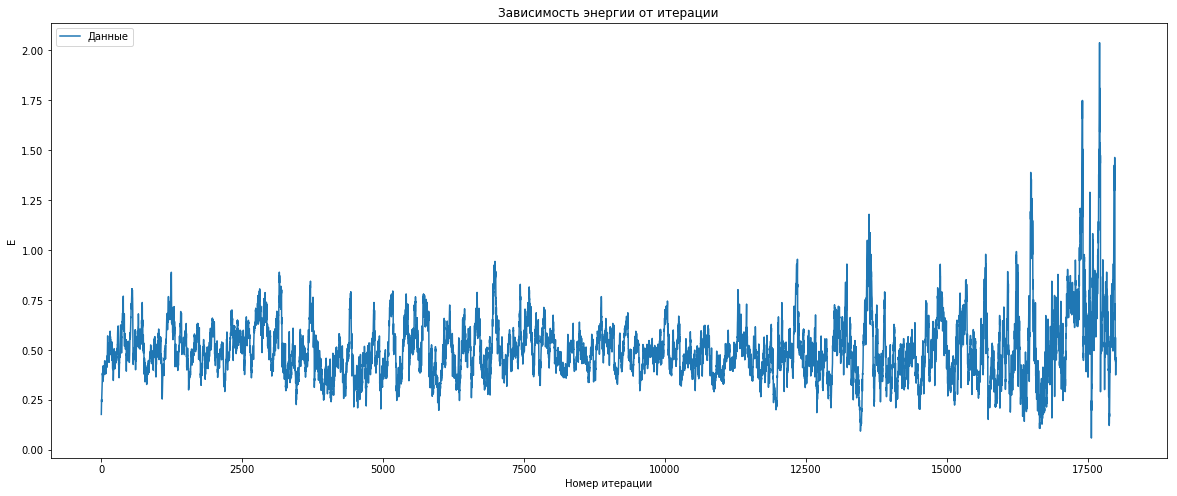

In [10]:
frame_withoutRefNE = pd.read_csv('outputNE_withoutRef.csv')
drawNE(frame_withoutRefNE)